In [140]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

In [141]:
data = pd.read_csv("bank-direct-marketing-campaigns.csv")
data.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [142]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['month'] = le.fit_transform(data['month'])
data['education'] = le.fit_transform(data['education'])
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])



In [144]:
X = data[['age', 'job', 'marital', 'education', 'housing', 'loan',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous',
    'poutcome', 'emp.var.rate','cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']]
y = data['y']

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

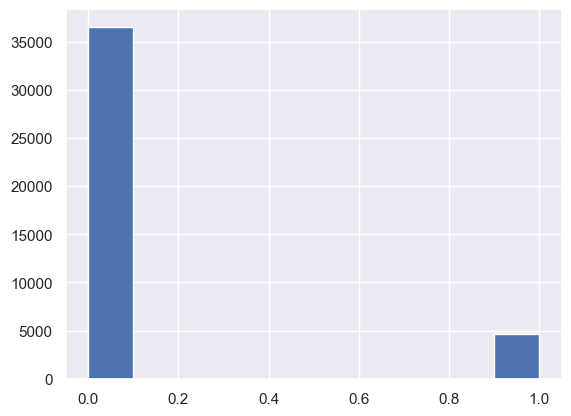

In [145]:
plt.hist(data['y'])

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [149]:
#uses x test portion of dataset to make predictions
y_pred = classifier.predict(X_test)

In [150]:
#prints predictions that were made in previous block of code
print(y_pred)
numyes = 0
numno = 0
for i in range(len(y_pred)):
    if y_pred[i] == 0.0:
        numno+=1
    elif y_pred[i] == 1.0:
        numyes+=1
    else: break
print('number of predicted yes values: ', numyes)
print('number of predicted no values: ', numno)
print('likelihood of customer saying yes based on predicted values: ', numyes / (numno + numyes), ' percent')
        

[0 0 0 ... 1 0 1]
number of predicted yes values:  1372
number of predicted no values:  6866
likelihood of customer saying yes based on predicted values:  0.16654527798009225  percent


In [151]:
y_test

15500    1
29034    0
11199    0
22247    0
27180    0
        ..
34422    0
14868    0
40057    1
24321    0
37567    0
Name: y, Length: 8238, dtype: int64

(array([6866.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

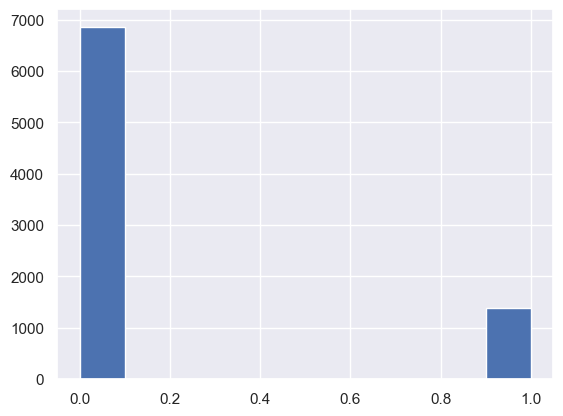

In [152]:
plt.hist(y_pred)

In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[6384,  935],
       [ 482,  437]])

In [154]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8279922311240593


In [168]:
#starting hyper parameter tuning
'''Hyperparameter Tuning to improve Accuracy
Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation.

Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform 
"power transformation" on each feature to make it more or less normally distributed. By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation.'''
np.logspace(0,-9, num=10)


array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [156]:

from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [157]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [158]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [159]:
gs_NB.best_score_

0.8959301554459124

In [160]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

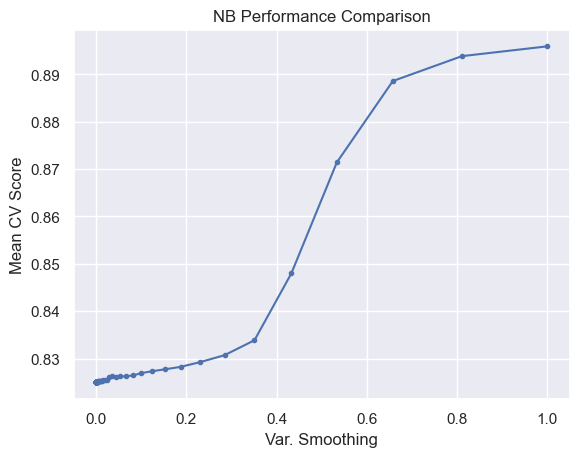

In [161]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [162]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8958485069191552


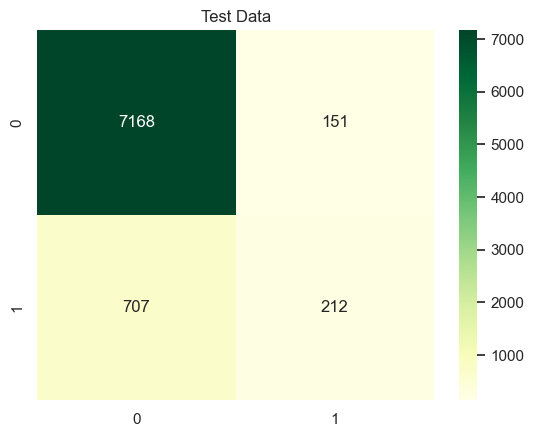

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score
sns.heatmap((confusion_matrix(y_test,predict_test
                             )),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');